In [1]:
import gzip, json
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 150)

data_file = "../_data/wiki/20220301.en.1gb.json.gz"

In [2]:
file = (gzip.open(data_file, 'r') if data_file.endswith(".gz")
        else open(data_file, 'r'))

wiki = json.loads(file.read())
hf_config = wiki["config"]["hf_config"]
article_titles = wiki["article_title"]
article_to_dataset_id = wiki["article_to_dataset_id"]

file.close()

wiki_ds = load_dataset("wikipedia", hf_config, split="train")

wiki = pd.DataFrame(wiki["train"])
wiki["dataset_id"] = wiki["article_id"].apply(lambda id: article_to_dataset_id.get(str(id)))
wiki["space_count"] = wiki["sentence"].apply(lambda s: s.count(" "))

display(wiki)

Reusing dataset wikipedia (/Users/yenson/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559)


,article_id,sentence,dataset_id,space_count
0,14877816,Myeloid cell Nuclear Differentiation Antigen is a protein that in humans is encoded as MNDA gene.,1953327,15
1,14877816,The myeloid cell nuclear differentiation antigen (MNDA) is detected only in nuclei of cells of the granulocyte-monocyte lineage.,1953327,17
2,14877816,"A 200-amino acid region of human MNDA is strikingly similar to a region in the proteins encoded by a family of interferon-inducible mouse genes, d...",1953327,38
3,14877816,"The 1.8-kb MNDA mRNA, which contains an interferon-stimulated response element in the 5' UTR, was significantly upregulated in human monocytes exp...",1953327,23
4,14877816,"MNDA is located within 2,200 kb of FCER1A, APCS, CRP, and SPTA1.",1953327,11
...,...,...,...,...
8972946,14986688,"Until the Follo Line opens, there cannot be a capacity increase on international freight trains to Norway.",1963689,16
8972947,14986688,"The Rail Administration has set a goal of tripling the amount of rail freight by 2040, which for the South Corridor is equal to the removal of 750...",1963689,34
8972948,14986688,The Follo Line will also allow freight trains to pass during rush hour.,1963689,12
8972949,14986688,The project was initially scheduled for completion in late 2020.,1963689,9


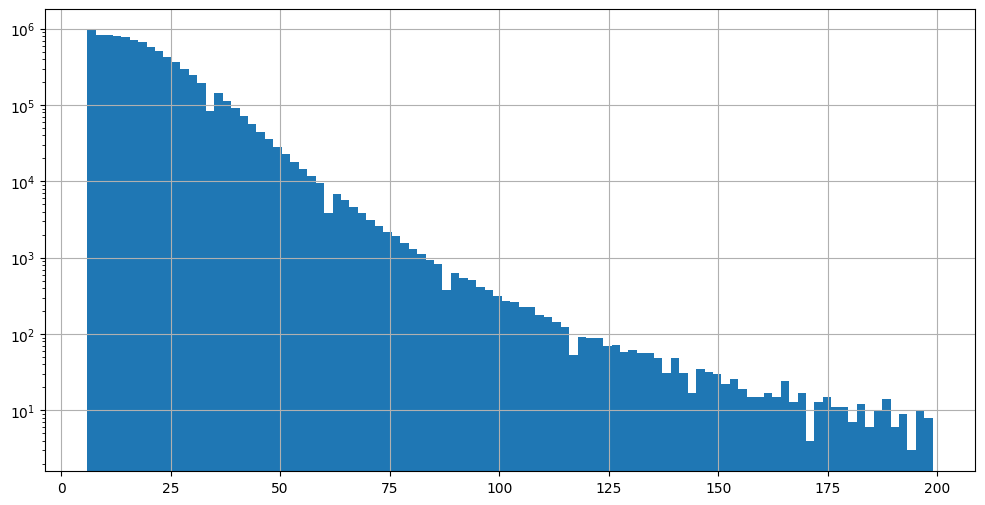

In [3]:
wiki["space_count"].hist(bins=100, figsize=(12, 6))
plt.yscale("log")

In [4]:
display(wiki.sort_values("space_count", ascending=False).head(10))

,article_id,sentence,dataset_id,space_count
3020975,278421,"the United States has, among other things, attempted or been perceived as attempting more or less unilaterally to do the following: pressure other...",132917,199
5337017,65848780,"Erik Andersson (M), 185 votes; Magdalena Andersson (S), 4,529 votes; Maria Arnholm (FP), 725 votes; Anti Avsan (M), 136 votes; Hanif Bali (M), 395...",6147675,199
8287901,34574024,"The courts affected were Courts Baron, Courts Leet, Customary Courts of the manor, Courts of Pie Poudre, Courts of the Staple, Courts of the clerk...",3696456,199
7505198,58387351,Whereas there has been a horrid and detestable Conspiracy formed & carried on by Papists and other wicked and traiterous Persons for assassinating...,5614029,199
6779791,21148264,"Both nations have signed several agreements such as a Cultural Agreement (1968); Agreement for Free Transit for Tourists, their Personal Effects a...",2513848,199
5337022,65848780,"Martin Andreasson (FP), 259 votes; Gunnar Andrn (FP), 199 votes; Lars ngstrm (MP), 836 votes; Eva Arvidsson (S), 606 votes; Christina Axelsson (S)...",6147675,198
5574231,54772542,"Andrea MantegnaDeath of the Virgin, 1462 circa, tempera and gold on canvas, 5442cm, Madrid, Museo del PradoChrist Bearing the Soul of the Virgin, ...",5336032,198
6255498,31512286,"As a theatre maker her work includes: Still Life Still (Prime Cut Productions), Come Forward to Meet You (Upstate), World's End Lane (Nominated Be...",3435713,198
8215959,62718089,"Thandeka's books include Love Beyond Belief: Finding the Access Point to Spiritual Awareness (2018), which tracks how (1) Christian theology lost ...",5927379,197
1743377,2870356,"In 2018, Japan produced 9.7 million tons of rice (13th largest producer in the world), 3.6 million tons of sugar beet (used to produce sugar and e...",688609,197


In [7]:
# display(wiki[wiki["space_count"]>200].sort_values("space_count"))
display(wiki.sort_values("space_count").head(10))

,article_id,sentence,dataset_id,space_count
2087415,46338652,Juvenile detention centers in the United States,4686571,6
425825,25276250,"ED-1 Monitor - Equalizer for SR-Lambda/Professional, 1988",2915412,6
877123,10640116,", Japanese former football player and manager",1547294,6
425823,25276250,"ELS-8X BB - Electrostatic loudspeaker, 1987 (battery-biased)",2915412,6
425822,25276250,"ESTA-4U Extra - Electrostatic loudspeaker, 1983 (self-biasing)",2915412,6
877124,10640116,", Japanese actress, tarento, and fashion model",1547294,6
3357594,102873,Demo Cates - jazz/R&B saxophonist and singer,48935,6
425817,24018705,"Bi'lin, from the Khalil Sakakini Cultural Center",2801126,6
4287850,27818524,Wales national football team records and statistics,3136923,6
425814,24018705,The site is surrounded by barbed wire.,2801126,6


In [9]:
idx = 877123
# wiki.iloc[idx].sentence
wiki_ds[int(wiki["dataset_id"][idx])]

{'id': '10640116',
 'url': 'https://en.wikipedia.org/wiki/Kurosaki',
 'title': 'Kurosaki',
 'text': 'Kurosaki may refer to:\n\nPeople with the surname\n, Japanese former football player and manager\n, Japanese singer and songwriter\n, Japanese rower\n, Japanese actress, tarento, and fashion model\nRyan Kurosaki (born 1952), American former baseball player\n\nFictional characters\nIchigo Kurosaki, a character in Bleach \nIsshin Kurosaki, a character in Bleach\nMasaki Kurosaki, a character in Bleach\nKarin Kurosaki, a character in Bleach\nYuzu Kurosaki, a character in Bleach \nMea Kurosaki, a character in To Love-Ru Darkness \nTasuku Kurosaki, a character from the Dengeki Daisy manga series\nMiu Kurosaki, a character in The King of Fighters universe\nMiki Kurosaki, a character in the Digimon Data Squad\nSayoko Kurosaki and daughter Asami Kurosaki, characters in Mahoraba \nHisoka Kurosaki, a character in Descendants of Darkness \nShun Kurosaki and sister Ruri Kurosaki in Yu-Gi-Oh! Arc-V\n